In [26]:
# importação de bibliotecas e funções
#utilizado Keras por ser uma abstaração sobre a Tensorflow que facilita seu uso
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Text(0.5, 1.0, '0')

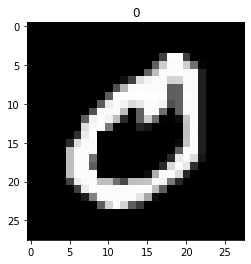

In [20]:
#importação dos daso e divisão em treinamento e teste
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()
#visualização de iamgens esecíficas
plt.imshow(x_treinamento[21], cmap= 'gray')
plt.title(y_treinamento[21])

In [21]:
#mudança de dimensões, originalmente estáem 25x28 e precisamos 784
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [22]:
#tranformação dos dados para normalização em formato float
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')

In [23]:
#normalização (255 é o valor máximo de um pixel)
x_treinamento/=255
x_teste /= 255


In [24]:
#transformação para formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [28]:
# estrutura da rede neural: 784 - 64 - 64 -64 - 10
# dropout é utilizado para zerar uma part dos neurônios para evitar overfitting (modelo super ajustado)
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [30]:
#visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [35]:
#configuração dos parâmetros da rede neural e treianmento (utilizando base de dados de validação)
#na variável historico temos os históricos das execuções (erro e accuracy)
modelo.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])
historico = modelo.fit(x_treinamento, y_treinamento, epochs = 40, validation_data = (x_teste, y_teste))

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0826 - accuracy: 0.9754 - val_loss: 0.0970 - val_accuracy: 0.9754
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9747 - val_loss: 0.0890 - val_accuracy: 0.9758
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.0978 - val_accuracy: 0.9761
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9759 - val_loss: 0.0900 - val_accuracy: 0.9758
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0777 - accuracy: 0.9760 - val_loss: 0.0877 - val_accuracy: 0.9760
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0878 - val_accuracy: 0.9777
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9764 - val_loss: 0.0915 - val_accuracy:

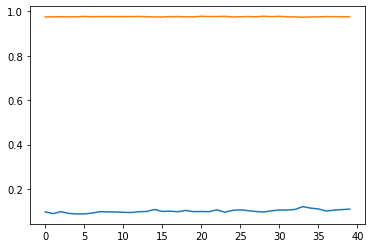

In [36]:
# gráfico para visualização de erros e de accuracy
historico.history.keys()
#evolução do erra em azul
plt.plot(historico.history['val_loss'])
#performance da rede em laranja
plt.plot(historico.history['val_accuracy'])

In [37]:
#obtendo as previsões
previsoes = modelo.predict(x_teste)
previsoes

array([[8.28799431e-13, 2.28065788e-09, 8.40542036e-09, ...,
        9.99999881e-01, 1.79806560e-12, 1.27554074e-07],
       [1.57661525e-15, 3.25441607e-09, 1.00000000e+00, ...,
        1.50209151e-11, 2.33949263e-14, 1.40881834e-21],
       [2.21162910e-12, 1.00000000e+00, 2.81695782e-12, ...,
        1.86084026e-09, 1.01925632e-08, 3.44406455e-15],
       ...,
       [1.10788926e-19, 1.00958155e-16, 4.10454277e-14, ...,
        9.06548059e-10, 1.18607186e-14, 2.34991617e-07],
       [1.67639095e-23, 1.68273121e-26, 1.21032881e-21, ...,
        2.26903882e-20, 7.11891136e-12, 5.58103974e-16],
       [1.41497955e-14, 5.57885860e-27, 8.56762113e-17, ...,
        7.55995723e-37, 1.62404581e-15, 3.81355280e-24]], dtype=float32)

In [42]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração de matriz de cofusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao


array([[ 971,    1,    0,    1,    0,    1,    3,    2,    1,    0],
       [   1, 1121,    3,    1,    0,    0,    2,    0,    7,    0],
       [   1,    1, 1011,    5,    1,    1,    1,    8,    3,    0],
       [   0,    0,    8,  985,    0,    6,    0,    4,    3,    4],
       [   0,    0,    3,    1,  960,    0,    5,    3,    1,    9],
       [   2,    1,    0,    6,    1,  867,    4,    1,    7,    3],
       [   4,    1,    1,    1,    5,    4,  941,    0,    1,    0],
       [   2,    5,    9,    5,    0,    0,    0, 1005,    1,    1],
       [   7,    1,   10,    5,    4,    4,    2,    3,  936,    2],
       [   1,    5,    1,    9,   17,    5,    0,    7,    5,  959]],
      dtype=int64)

In [43]:
#previsao de um novo regirtro, convertendo o array para formato de matriz (número 4)
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [44]:
#passo a mesma posição para modelo prever
novo = x_treinamento[20]
# tranformação de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]